In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

ModuleNotFoundError: No module named 'pandas'

In [2]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')



In [5]:
df = pd.read_csv('./train.csv')
df_kg = pd.read_csv('./test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_kg.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_kg.drop(['Name'], axis=1, inplace=True)

df_kg.Cabin.astype(str)

PassengerId
892      nan
893      nan
894      nan
895      nan
896      nan
        ... 
1305     nan
1306    C105
1307     nan
1308     nan
1309     nan
Name: Cabin, Length: 418, dtype: object

In [6]:
# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_kg.Cabin.fillna('N', inplace=True)
df_kg.Fare.fillna(df1.Fare.median(), inplace=True)
df_kg.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_kg.Cabin = df_kg.Cabin.apply(lambda x:x[0])



In [7]:
# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_kg[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_kg[i] = globals()[f'df_kg_{i}_encoder'].transform(df_kg[i])



In [8]:
# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

In [9]:
# train, test 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=19)

In [10]:
dt_clf1 = DecisionTreeClassifier()
dt_clf1.fit(X, y)
dt_hat1 = dt_clf1.predict(df_kg)
result_df = pd.DataFrame({'dt1':dt_hat1})
result_df.index = list(range(892, 892 + result_df.shape[0]))

In [12]:
dt_clf2 = DecisionTreeClassifier(ccp_alpha=0.01)
dt_clf2.fit(X, y)
dt_hat2 = dt_clf2.predict(df_kg)
result_df['dt2'] = dt_hat2

In [13]:
dt_clf3 = DecisionTreeClassifier(max_depth=5)
dt_clf3.fit(X, y)
dt_hat3 = dt_clf3.predict(df_kg)
result_df['dt3'] = dt_hat3

In [14]:
dt_clf4 = DecisionTreeClassifier(min_samples_split=5)
dt_clf4.fit(X, y)
dt_hat4 = dt_clf4.predict(df_kg)
result_df['dt4'] = dt_hat4

In [15]:
bg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators=500, bootstrap=True, n_jobs=4, oob_score=True)
bg_clf.fit(X, y)
print(bg_clf.oob_score_)
bg_hat = bg_clf.predict(df_kg)
result_df['bg1'] = bg_hat

0.8338945005611672


In [16]:
bg_clf1 = BaggingClassifier(base_estimator=RandomForestClassifier(),
                           n_estimators=1000, bootstrap=False, n_jobs=4)
bg_clf1.fit(X, y)
bg_hat1 = bg_clf1.predict(df_kg)
result_df['bg2'] = bg_hat1

In [17]:
rf_clf  = RandomForestClassifier(n_estimators=2000, bootstrap=True, max_samples=0.5,
                                 max_depth=7, n_jobs=4, oob_score=True)
rf_clf.fit(X, y)
print(rf_clf.oob_score_)
rf_hat = rf_clf.predict(df_kg)
result_df['rf'] = rf_hat

0.8316498316498316


In [18]:
rf_clf1  = RandomForestClassifier(n_estimators=2000, bootstrap=True, max_samples=0.2,
                                 ccp_alpha=0.05, n_jobs=4, oob_score=True)
rf_clf1.fit(X, y)
print(rf_clf1.oob_score_)
rf_hat1 = rf_clf1.predict(df_kg)
result_df['rf1'] = rf_hat1

0.7710437710437711


In [19]:
et_clf  = ExtraTreesClassifier(n_estimators=500, bootstrap=True, n_jobs=4, oob_score=True)
et_clf.fit(X, y)
print(et_clf.oob_score_)
et_hat = et_clf.predict(df_kg)
result_df['et'] = et_hat

0.8170594837261503


In [20]:
et_clf1  = ExtraTreesClassifier(n_estimators=100, min_samples_split=10, bootstrap=False, n_jobs=4)
et_clf1.fit(X, y)
et_hat1 = et_clf1.predict(df_kg)
result_df['et1'] = et_hat1

In [21]:
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_10 = KNeighborsClassifier(n_neighbors=10)
knn_clf_20 = KNeighborsClassifier(n_neighbors=20)
knn_clf_30 = KNeighborsClassifier(n_neighbors=30)
knn_clf_40 = KNeighborsClassifier(n_neighbors=40)
knn_clf_5.fit(X, y)
knn_clf_10.fit(X, y)
knn_clf_20.fit(X, y)
knn_clf_30.fit(X, y)
knn_clf_40.fit(X, y)
result_df['knn5'] = knn_clf_5.predict(df_kg)
result_df['knn10'] = knn_clf_10.predict(df_kg)
result_df['knn20'] = knn_clf_20.predict(df_kg)
result_df['knn30'] = knn_clf_30.predict(df_kg)
result_df['knn40'] = knn_clf_40.predict(df_kg)

In [22]:
lr_clf  = LogisticRegression(C=0.05)
lr_clf.fit(X, y)
result_df['lr'] = lr_clf.predict(df_kg)

In [23]:
svm_clf = SVC(probability=True, kernel='rbf')
svm_clf1 = SVC(probability=True, kernel='poly')
svm_clf2 = SVC(probability=True, kernel='sigmoid')
svm_clf.fit(X, y)
svm_clf1.fit(X, y)
svm_clf2.fit(X, y)
result_df['svm'] = svm_clf.predict(df_kg)
result_df['svm1'] = svm_clf1.predict(df_kg)
result_df['svm2'] = svm_clf2.predict(df_kg)

In [24]:
result_df.corr()

,dt1,dt2,dt3,dt4,bg1,bg2,rf,rf1,et,et1,knn5,knn10,knn20,knn30,knn40,lr,svm,svm1,svm2
dt1,1.000000,0.536905,0.639107,0.824966,0.665566,0.664219,0.611273,0.517559,0.574932,0.570456,0.137046,0.114912,0.194731,0.239242,0.233719,0.525409,0.220443,0.095924,-0.124319
dt2,0.536905,1.000000,0.802298,0.545839,0.751197,0.796129,0.859313,0.915461,0.734185,0.777730,-0.001136,0.044659,0.051094,0.050243,0.044897,0.819278,0.077376,0.098996,0.027164
dt3,0.639107,0.802298,1.000000,0.665294,0.749206,0.778321,0.815504,0.732599,0.738415,0.764080,0.132876,0.182813,0.183996,0.167163,0.169716,0.817758,0.258722,0.102841,-0.131815
dt4,0.824966,0.545839,0.665294,1.000000,0.677306,0.657345,0.621921,0.525404,0.597387,0.561622,0.118796,0.165560,0.178510,0.206003,0.197892,0.508580,0.192967,0.104608,-0.087339
bg1,0.665566,0.751197,0.749206,0.677306,1.000000,0.867824,0.819441,0.729709,0.816808,0.799794,0.121295,0.186071,0.166520,0.157978,0.156359,0.635629,0.229874,0.091318,-0.092527
bg2,0.664219,0.796129,0.778321,0.657345,0.867824,1.000000,0.893477,0.796520,0.848110,0.852573,0.110901,0.145082,0.159938,0.160461,0.137634,0.707878,0.197299,0.116518,-0.018745
rf,0.611273,0.859313,0.815504,0.621921,0.819441,0.893477,1.000000,0.848643,0.842246,0.886795,0.089098,0.136342,0.175708,0.167901,0.143202,0.803298,0.187745,0.125270,-0.008320
rf1,0.517559,0.915461,0.732599,0.525404,0.729709,0.796520,0.848643,1.000000,0.713383,0.756553,0.023450,0.056136,0.074672,0.074379,0.068699,0.778860,0.102590,0.102973,0.023803
et,0.574932,0.734185,0.738415,0.597387,0.816808,0.848110,0.842246,0.713383,1.000000,0.903522,0.110901,0.179935,0.171398,0.182445,0.171264,0.697798,0.260576,0.085770,-0.102322
et1,0.570456,0.777730,0.764080,0.561622,0.799794,0.852573,0.886795,0.756553,0.903522,1.000000,0.117768,0.194772,0.198078,0.210003,0.198332,0.742378,0.268615,0.090381,-0.099420


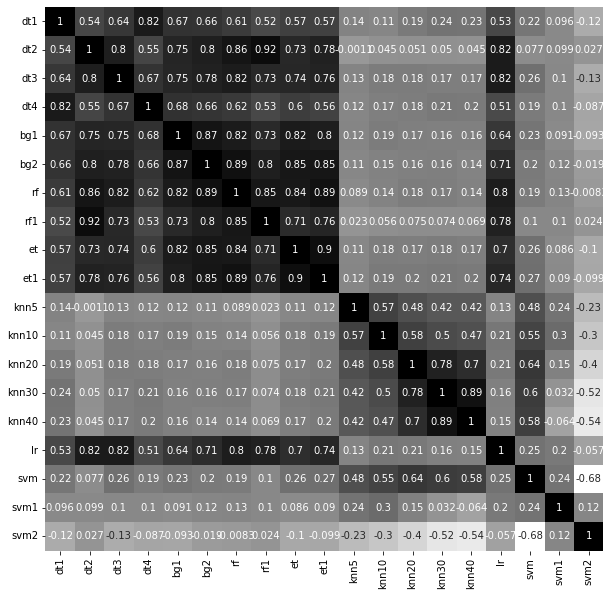

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(result_df.corr(),annot=True, cbar=False, cmap='binary')
plt.show()

In [26]:
clfs = [('dt1', dt_clf1), ('dt2', dt_clf2), ('dt3', dt_clf3), ('dt4', dt_clf4),
        ('bg', bg_clf), ('bg1', bg_clf1), 
        ('rf', rf_clf), ('rf1', rf_clf1), 
        ('et', et_clf), ('et1', et_clf1),
        ('knn5', knn_clf_5), ('knn10', knn_clf_10), ('knn20', knn_clf_20),
        ('knn30', knn_clf_30), ('knn40', knn_clf_40),
        ('lr', lr_clf),
        ('svm', svm_clf), ('svm1', svm_clf1), ('svm2', svm_clf2)]

In [28]:
vo_clf  = VotingClassifier(estimators=clfs, voting='soft')
vo_clf.fit(X_train, y_train)
vo_clf.score(X_val, y_val)

0.8777777777777778

In [ ]:
vo_clf.fit(X, y)
kg_up = df_kg.copy()
kg_up['Survived'] = vo_clf.predict(df_kg)
kg_up.Survived.to_csv('kaggle_upload_bagging3.csv')